## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.516140  1.707309  0.031174  1.348106 -1.091466 -0.563076
1  0.568942 -0.875926  0.752942 -1.337792 -0.451008 -1.010564
2  0.634202 -0.547512  0.253831 -1.613177 -0.592582 -1.054390
3  0.529410 -1.316365 -1.178659  1.171753  1.131835  0.596343
4 -0.060997  0.958935  0.388936  1.130418  0.207450  1.163881


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9675786	total: 57.8ms	remaining: 57.8s
1:	learn: 0.9566646	total: 58.3ms	remaining: 29.1s
2:	learn: 0.9455249	total: 58.9ms	remaining: 19.6s
3:	learn: 0.9339649	total: 59.4ms	remaining: 14.8s
4:	learn: 0.9249823	total: 59.9ms	remaining: 11.9s
5:	learn: 0.9168010	total: 60.4ms	remaining: 10s
6:	learn: 0.9049947	total: 61.1ms	remaining: 8.66s
7:	learn: 0.8949317	total: 61.8ms	remaining: 7.66s
8:	learn: 0.8856911	total: 62.2ms	remaining: 6.85s
9:	learn: 0.8768829	total: 62.8ms	remaining: 6.22s
10:	learn: 0.8662505	total: 63.5ms	remaining: 5.7s
11:	learn: 0.8556935	total: 63.9ms	remaining: 5.26s
12:	learn: 0.8452686	total: 64.4ms	remaining: 4.89s
13:	learn: 0.8366668	total: 65ms	remaining: 4.58s
14:	learn: 0.8286047	total: 65.5ms	remaining: 4.3s
15:	learn: 0.8197900	total: 65.9ms	remaining: 4.05s
16:	learn: 0.8106914	total: 66.3ms	remaining: 3.83s
17:	learn: 0.8025126	total: 66.8ms	remaining: 3.65s
18:	learn: 0.7938771	total: 67.3ms	remaining: 3.47

89:	learn: 0.3909120	total: 104ms	remaining: 1.05s
90:	learn: 0.3873607	total: 105ms	remaining: 1.04s
91:	learn: 0.3840476	total: 105ms	remaining: 1.03s
92:	learn: 0.3805710	total: 105ms	remaining: 1.03s
93:	learn: 0.3768535	total: 106ms	remaining: 1.02s
94:	learn: 0.3741017	total: 106ms	remaining: 1.01s
95:	learn: 0.3707649	total: 107ms	remaining: 1.01s
96:	learn: 0.3674559	total: 107ms	remaining: 1000ms
97:	learn: 0.3642435	total: 108ms	remaining: 992ms
98:	learn: 0.3607999	total: 108ms	remaining: 985ms
99:	learn: 0.3577320	total: 109ms	remaining: 977ms
100:	learn: 0.3544556	total: 109ms	remaining: 970ms
101:	learn: 0.3513940	total: 109ms	remaining: 964ms
102:	learn: 0.3485596	total: 110ms	remaining: 957ms
103:	learn: 0.3460394	total: 110ms	remaining: 950ms
104:	learn: 0.3430649	total: 111ms	remaining: 943ms
105:	learn: 0.3395178	total: 111ms	remaining: 938ms
106:	learn: 0.3363313	total: 112ms	remaining: 931ms
107:	learn: 0.3336172	total: 112ms	remaining: 926ms
108:	learn: 0.3311447	

262:	learn: 0.0998637	total: 186ms	remaining: 521ms
263:	learn: 0.0991823	total: 186ms	remaining: 520ms
264:	learn: 0.0986037	total: 187ms	remaining: 519ms
265:	learn: 0.0978180	total: 187ms	remaining: 517ms
266:	learn: 0.0970487	total: 188ms	remaining: 516ms
267:	learn: 0.0963723	total: 188ms	remaining: 514ms
268:	learn: 0.0957535	total: 189ms	remaining: 513ms
269:	learn: 0.0951758	total: 189ms	remaining: 511ms
270:	learn: 0.0945343	total: 189ms	remaining: 509ms
271:	learn: 0.0940146	total: 190ms	remaining: 508ms
272:	learn: 0.0933602	total: 190ms	remaining: 507ms
273:	learn: 0.0927665	total: 191ms	remaining: 506ms
274:	learn: 0.0921388	total: 191ms	remaining: 504ms
275:	learn: 0.0915591	total: 192ms	remaining: 503ms
276:	learn: 0.0910474	total: 192ms	remaining: 502ms
277:	learn: 0.0904378	total: 193ms	remaining: 501ms
278:	learn: 0.0898765	total: 193ms	remaining: 500ms
279:	learn: 0.0891912	total: 194ms	remaining: 498ms
280:	learn: 0.0886032	total: 194ms	remaining: 497ms
281:	learn: 

473:	learn: 0.0357259	total: 286ms	remaining: 317ms
474:	learn: 0.0355826	total: 286ms	remaining: 316ms
475:	learn: 0.0354787	total: 287ms	remaining: 315ms
476:	learn: 0.0353323	total: 287ms	remaining: 315ms
477:	learn: 0.0351886	total: 288ms	remaining: 314ms
478:	learn: 0.0350877	total: 288ms	remaining: 314ms
479:	learn: 0.0349463	total: 289ms	remaining: 313ms
480:	learn: 0.0348913	total: 289ms	remaining: 312ms
481:	learn: 0.0347529	total: 290ms	remaining: 311ms
482:	learn: 0.0346124	total: 290ms	remaining: 311ms
483:	learn: 0.0345151	total: 291ms	remaining: 310ms
484:	learn: 0.0343795	total: 291ms	remaining: 309ms
485:	learn: 0.0343267	total: 292ms	remaining: 309ms
486:	learn: 0.0341940	total: 293ms	remaining: 308ms
487:	learn: 0.0340581	total: 293ms	remaining: 307ms
488:	learn: 0.0339282	total: 293ms	remaining: 307ms
489:	learn: 0.0337958	total: 294ms	remaining: 306ms
490:	learn: 0.0337025	total: 294ms	remaining: 305ms
491:	learn: 0.0335755	total: 295ms	remaining: 304ms
492:	learn: 

660:	learn: 0.0171630	total: 366ms	remaining: 188ms
661:	learn: 0.0170728	total: 367ms	remaining: 187ms
662:	learn: 0.0170160	total: 367ms	remaining: 187ms
663:	learn: 0.0169279	total: 368ms	remaining: 186ms
664:	learn: 0.0168797	total: 368ms	remaining: 185ms
665:	learn: 0.0167885	total: 369ms	remaining: 185ms
666:	learn: 0.0167460	total: 369ms	remaining: 184ms
667:	learn: 0.0166712	total: 370ms	remaining: 184ms
668:	learn: 0.0166166	total: 370ms	remaining: 183ms
669:	learn: 0.0165280	total: 371ms	remaining: 183ms
670:	learn: 0.0164868	total: 371ms	remaining: 182ms
671:	learn: 0.0164412	total: 372ms	remaining: 181ms
672:	learn: 0.0163522	total: 372ms	remaining: 181ms
673:	learn: 0.0163076	total: 373ms	remaining: 180ms
674:	learn: 0.0162375	total: 373ms	remaining: 180ms
675:	learn: 0.0161973	total: 373ms	remaining: 179ms
676:	learn: 0.0161149	total: 374ms	remaining: 178ms
677:	learn: 0.0160637	total: 374ms	remaining: 178ms
678:	learn: 0.0159792	total: 375ms	remaining: 177ms
679:	learn: 

896:	learn: 0.0076861	total: 469ms	remaining: 53.8ms
897:	learn: 0.0076572	total: 469ms	remaining: 53.3ms
898:	learn: 0.0076273	total: 470ms	remaining: 52.8ms
899:	learn: 0.0076014	total: 470ms	remaining: 52.2ms
900:	learn: 0.0075886	total: 471ms	remaining: 51.7ms
901:	learn: 0.0075683	total: 471ms	remaining: 51.2ms
902:	learn: 0.0075373	total: 472ms	remaining: 50.7ms
903:	learn: 0.0075051	total: 472ms	remaining: 50.2ms
904:	learn: 0.0074852	total: 473ms	remaining: 49.6ms
905:	learn: 0.0074697	total: 473ms	remaining: 49.1ms
906:	learn: 0.0074446	total: 474ms	remaining: 48.6ms
907:	learn: 0.0074294	total: 474ms	remaining: 48ms
908:	learn: 0.0074124	total: 474ms	remaining: 47.5ms
909:	learn: 0.0073707	total: 475ms	remaining: 47ms
910:	learn: 0.0073584	total: 475ms	remaining: 46.4ms
911:	learn: 0.0073420	total: 476ms	remaining: 45.9ms
912:	learn: 0.0073126	total: 476ms	remaining: 45.4ms
913:	learn: 0.0072820	total: 477ms	remaining: 44.9ms
914:	learn: 0.0072661	total: 477ms	remaining: 44.3

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

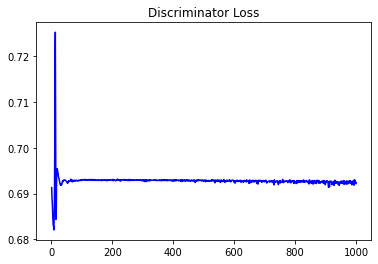

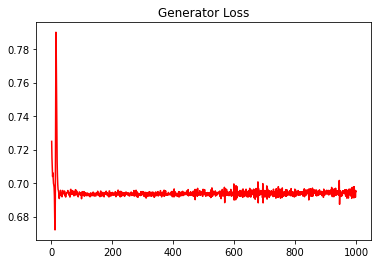

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.07932338451494723


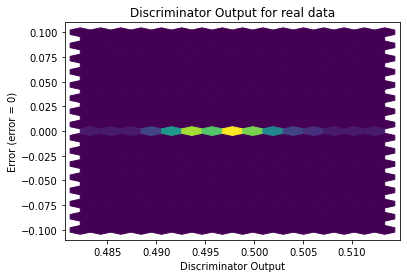

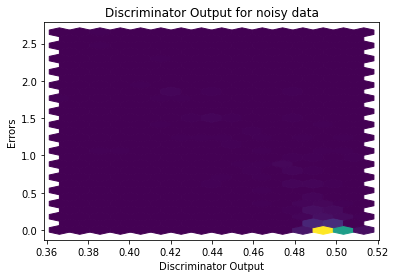

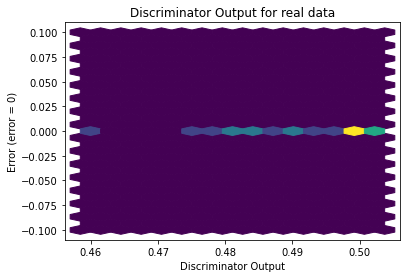

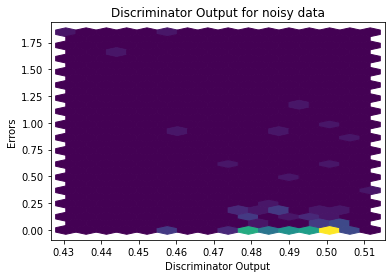

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


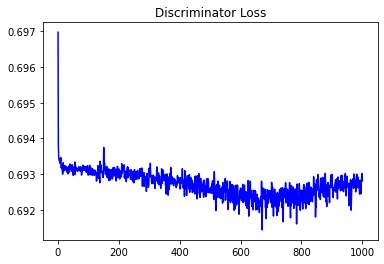

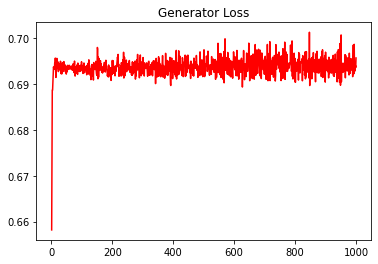

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.07663711058192922


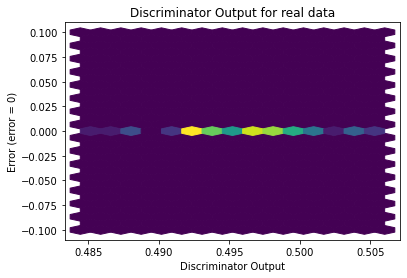

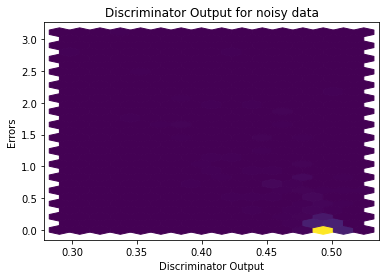

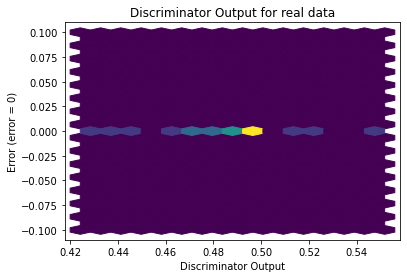

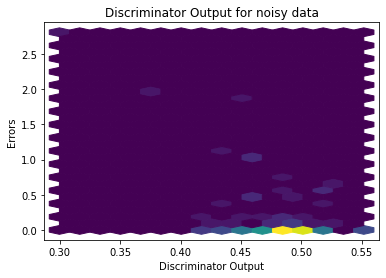

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1512]], requires_grad=True)
